# Updated plotting functions
__Authors__: Cristina Marianini and Lucie Savier

This tutorial explores the visualization upgrades that were included in our updated package. This upgrade is focused on __Scatter plots for embeddings__. 

In this tutorial, we will use a preprocessed PBMC dataset. This dataset has been already preprocessed, addition we will compute the highly variable genes since the PCA/UMAP/t-SNE have already been computed.

In this tutorial, we will also use the following literature markers:
- B-cell: CD79A, MS4A1
- Plasma: IGJ (JCHAIN)
- T-cell: CD3D
- NK: GNLY, NKG7
- Myeloid: CST3, LYZ
- Monocytes: FCGR3A
- Dendritic: FCER1A

### Import PBMC dataset
The data consist of PBMCs cells from a Healthy Donor and are freely available from 10x Genomics. This consists on peripheral blood mononuclear cells (PBMCs), which are a type of white blood cell found in the bloodstream and play a crucial role in the immune system, that where analyzed with the technology developed for single-cell analysis by the 10x Genomics company. 

We decided to use the whole dataset with only a few preprocessing steps (quality wise) to highly the importance of correctly selecting the analyzed data. This data already contains the calculated coordinates for the umap and tsne, which are necesarry for the new generated functions.

In [1]:
import scanpy as sc
import anndata
import pooch # make sure to install this package in the venv
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

datapath = pooch.retrieve(
    url="https://figshare.com/ndownloader/files/40067737",
    known_hash="md5:b80deb0997f96b45d06f19c694e46243",
    path="./data",
    fname="scverse-getting-started-anndata-pbmc3k_processed.h5ad",
)

In [2]:
# inspect pbmc contents
pbmc = anndata.read_h5ad(datapath)
pbmc

AnnData object with n_obs × n_vars = 2638 × 11505
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain_cell_types'
    var: 'gene_names', 'n_cells', 'gene_ids'
    uns: 'louvain', 'louvain_colors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'
    obsp: 'distances_all'

### Modification of the dataset
Additionally we will calculate the highlest variable genes.

In [3]:
sc.pp.highly_variable_genes(pbmc, min_mean=0.0125, max_mean=3, min_disp=0.5)
pbmc

c:\Users\34619\scanpy_project\OOP-project\scanpy\preprocessing\_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


AnnData object with n_obs × n_vars = 2638 × 11505
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain_cell_types'
    var: 'gene_names', 'n_cells', 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'pca', 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'
    obsp: 'distances_all'

## Scatter plots

With scanpy package, scatter plots for tSNE, UMAP and several other embeddings are already available using the sc.pl.tsne, sc.pl.umap ... functions. Those functions access the data stored in adata.obsm. For example sc.pl.umap uses the information stored in adata.obsm['X_umap'] as well as compute the values is this category is missing in the dataset. 

The original functions are still available in the updated package since they compute the umap coordinates but this new version includes a new functionality with multiple methodss that may facilitate the user's interaction with the data. 

For the scatter plots, the value to plot is given as the color argument. This can be any gene or any column in .obs, where .obs is a DataFrame containing the annotations per observation/cell. Therefore we wanted to mantain this versability in the plotting options aand make it dinamic. For reference we include some plots obtained using the original scatter functions to compare what we were working with versus what we generated.

c:\Users\34619\scanpy_project\OOP-project\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\34619\scanpy_project\OOP-project\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\34619\scanpy_project\OOP-project\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\34619\scanpy_project\OOP-project\scanpy\

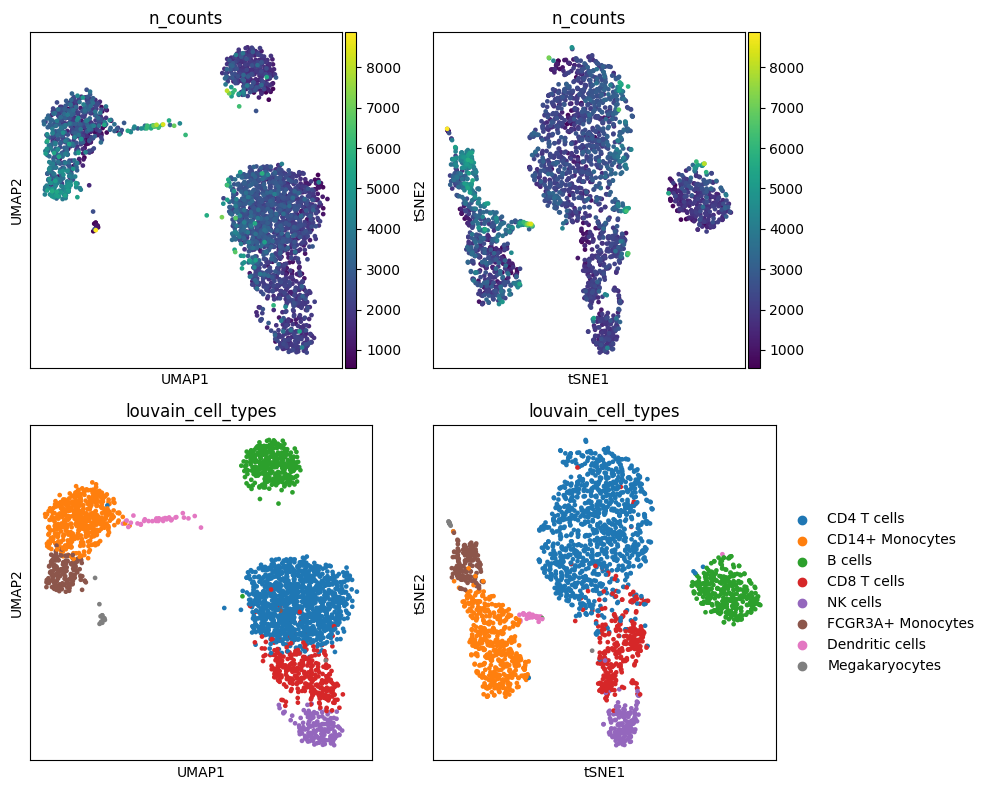

In [4]:
# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Adjust figsize as needed

# Plot UMAP with n_counts on the first row
sc.pl.umap(pbmc, color='n_counts', ax=axs[0, 0], show=False)
sc.pl.tsne(pbmc, color='n_counts', ax=axs[0, 1], show=False)

# Plot UMAP with louvain_cell_types on the second row
sc.pl.umap(pbmc, color='louvain_cell_types', ax=axs[1, 0], legend_loc=None, show=False)
sc.pl.tsne(pbmc, color='louvain_cell_types', ax=axs[1, 1], show=False)

# Adjust layout
plt.tight_layout()
plt.show()


Before including our improved scatter functions, we wanted to add additional information in the dinamic plotting. When generating the plot, it would show the x and y coordinates in the sliding wundow. We wanted to modify that information and decided to show *the most expressed genes* of that cell, which is why we created the following function. It can also be used for other calculations.

In [5]:
umap_x = -3.7
umap_y = 8.39
sc.pl.top_expressed_genes(pbmc, umap_x, umap_y, "tsne", n_genes=5)

['MALAT1', 'PNRC1', 'RPL7A', 'RPS2', 'RPS6']

### UMAP

**UMAP**, which stands for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly effective for preserving local and global structure in the data, making it a popular choice for exploratory data analysis and visualization tasks, especially in the field of single-cell genomics.

The decision to include a dynamic version of the UMAP visualization function with four methods stems from the diverse needs and preferences of users when exploring and interpreting single-cell genomics data. Here's a breakdown of why each method was included:

1. **Clusters**: Single-cell RNA sequencing data often contains distinct cell populations or clusters, which can represent different cell types or states. Visualizing these clusters using UMAP helps researchers identify and characterize these populations based on gene expression patterns. Including a dynamic version with this method allows users to interactively explore the data, hover over clusters to see top marker genes, and gain insights into the biological significance of each cluster.

2. **Total Counts (n_counts)**: Understanding the total counts of each cell in the dataset is essential for quality control and normalization steps in single-cell RNA sequencing analysis. Visualizing the total counts using UMAP provides insights into the distribution of sequencing depth across cells and can help identify potential outliers or technical artifacts. The dynamic version with this method allows users to visualize the distribution of total counts with a color gradient, making it easier to spot patterns and anomalies in the data.

3. **Bulk Labels**: In addition to clustering, single-cell RNA sequencing data may also include bulk labels or annotations that assign cell types or states based on prior knowledge or experimental conditions. Visualizing these bulk labels using UMAP helps validate clustering results, compare different datasets, or investigate the effects of experimental perturbations on cell populations. Including a dynamic version with this method enables users to interactively explore the annotations and gain insights into the biological context of the data.

4. **Explore Genes**: Marker genes play a crucial role in identifying cell types or states and understanding gene regulatory networks in single-cell genomics data. Allowing users to dynamically explore marker genes using UMAP facilitates hypothesis generation and testing by visualizing the expression patterns of selected genes across cells. This method empowers users to investigate the role of specific genes in defining cell identities or driving biological processes within the dataset.

By offering a dynamic version of the UMAP visualization function with these four methods, the tutorial aims to provide users with a comprehensive toolkit for exploring and interpreting single-cell genomics data, enabling them to gain deeper insights into the underlying biological mechanisms and heterogeneity of cellular populations.

In [6]:
sc.pl.umap_din(pbmc, visualization_option="clusters")

c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:NdOverlay   [Labels]
   :Scatter   [UMAP_X]   (UMAP_Y,Top_5_Genes)

In [7]:
sc.pl.umap_din(pbmc, visualization_option="n_counts")

:Scatter   [UMAP_X]   (UMAP_Y,Counts)

Dropdown(description='Select Gene:', options=('LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'HES4', 'ISG15', 'AGR…

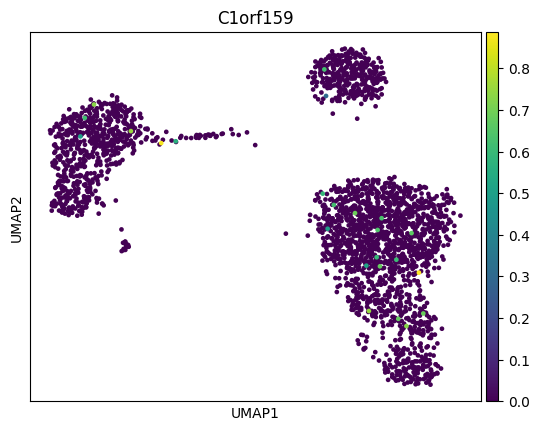

In [8]:
sc.pl.umap_din(pbmc, visualization_option="explore_genes")

### tSNE

**t-SNE**, short for t-distributed Stochastic Neighbor Embedding, is another popular dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. Like UMAP, t-SNE is widely used in exploratory data analysis and visualization tasks, particularly in the field of single-cell genomics. We included the same methos that the umap funciton which allows them to be compared.

**Why include both?** UMAP and t-SNE are effective dimensionality reduction techniques for visualizing high-dimensional data, they may highlight different aspects of the data and produce distinct clustering patterns due to differences in their algorithms. Offering dynamic versions of both UMAP and t-SNE visualization functions with four methods each provides users with a comprehensive toolkit for exploring and interpreting single-cell genomics data, allowing them to gain deeper insights into the heterogeneity and biological mechanisms underlying cellular populations.

t-SNE is preferred when the main goal is to visualize and explore complex local structures in the data, especially for identifying clusters or cell types. On the other hand, UMAP is preferred when you need a faster, more scalable method that preserves both local and global structures, making it suitable for general data exploration and visualization tasks.

In [9]:
sc.pl.tsne_din(pbmc, visualization_option="clusters")

c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:NdOverlay   [Labels]
   :Scatter   [tSNE_X]   (tSNE_Y,Top_5_Genes)

In [10]:
sc.pl.tsne_din(pbmc, visualization_option="n_counts")

:Scatter   [tSNE_X]   (tSNE_Y,Counts)

Dropdown(description='Select Gene:', options=('LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'HES4', 'ISG15', 'AGR…

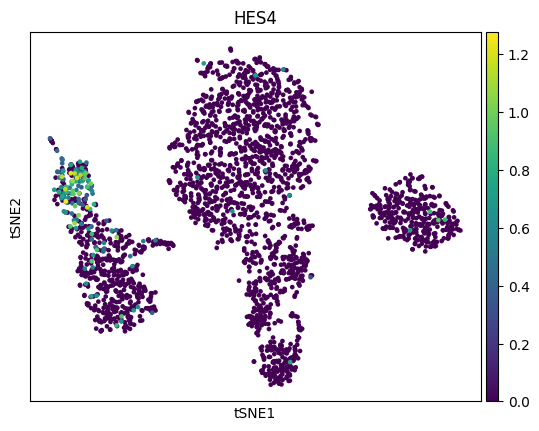

In [11]:
sc.pl.tsne_din(pbmc, visualization_option="explore_genes")

# Other possibilities for dimentionality reduction
We want to explore if amongst the genes or cell types, we can eliminate some that may be less interesting for the results. In particular, eliminating non relevant data allows to recalculate the data for UMAP/PCA or t-SNE which may give more meaningfull results (better cluster distinction). Therefore we decided to generate a new function which shows the user the attributes of the data that may help him/her to filter unnecessary data. 

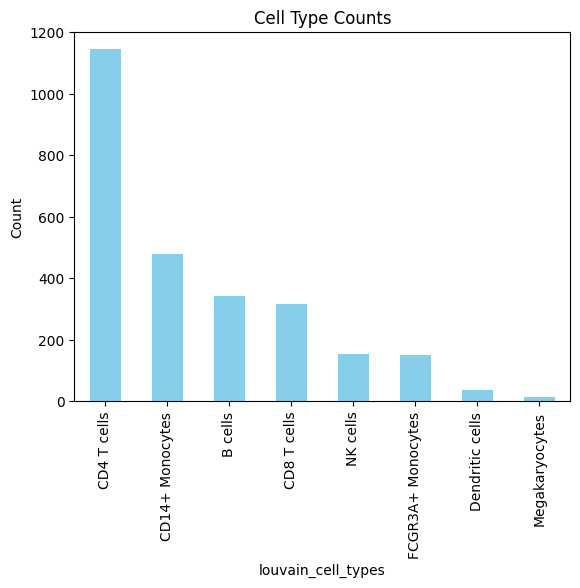

Cell Types:
1. CD4 T cells
2. B cells
3. CD14+ Monocytes
4. NK cells
5. CD8 T cells
6. FCGR3A+ Monocytes
7. Dendritic cells
8. Megakaryocytes
Deleting cell type: NK cells


c:\Users\34619\scanpy_project\OOP-project\scanpy\preprocessing\_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
c:\Users\34619\prueba_funciona\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\34619\prueba_funciona\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [12]:
new_anndata = sc.pp.dimensionality_reduction(pbmc,'cell_types')

In [13]:
scatter_plot_pbmc = sc.pl.umap_din(pbmc, visualization_option="clusters")
scatter_plot_new_anndata = sc.pl.umap_din(new_anndata, visualization_option="clusters")

scatter_plot_pbmc + scatter_plot_new_anndata

c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]
c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:Layout
   .NdOverlay.I  :NdOverlay   [Labels]
      :Scatter   [UMAP_X]   (UMAP_Y,Top_5_Genes)
   .NdOverlay.II :NdOverlay   [Labels]
      :Scatter   [UMAP_X]   (UMAP_Y,Top_5_Genes)

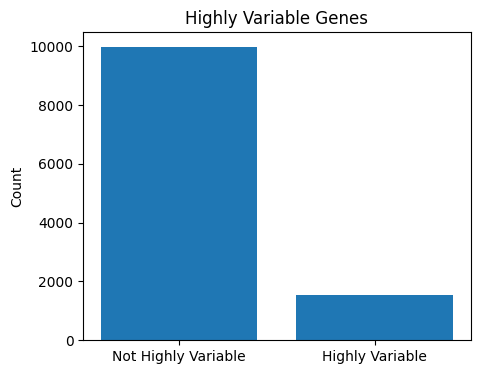

In [14]:
new_anndata = sc.pp.dimensionality_reduction(pbmc,'highly_variable')

In [15]:
scatter_plot_pbmc = sc.pl.umap_din(pbmc, visualization_option="clusters")
scatter_plot_new_anndata = sc.pl.umap_din(new_anndata, visualization_option="clusters")

scatter_plot_pbmc+scatter_plot_new_anndata

c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]
c:\Users\34619\prueba_funciona\Lib\site-packages\holoviews\core\data\pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:Layout
   .NdOverlay.I  :NdOverlay   [Labels]
      :Scatter   [UMAP_X]   (UMAP_Y,Top_5_Genes)
   .NdOverlay.II :NdOverlay   [Labels]
      :Scatter   [UMAP_X]   (UMAP_Y,Top_5_Genes)

In [16]:
new_anndata

AnnData object with n_obs × n_vars = 2638 × 11505
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain_cell_types'
    var: 'gene_names', 'n_cells', 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'pca', 'hvg', 'louvain_cell_types_colors', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances_all', 'distances', 'connectivities'

As we can see eliminating data changes drastically the saphe of clusters and the distance with the others. This decision of what to eliminate can be base in advances made with other tools or on previous knowledge, not randomly.

# Export functions
The anndata structure in which this data is stored may seem complicated for unexperienced programmers. Therefore this upgraded package includes functions to export the individuals matrices and other useful informations that form the AnnData object.
### Export counts (normalizad or raw)

In [20]:
pbmc

AnnData object with n_obs × n_vars = 2638 × 11505
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain_cell_types'
    var: 'gene_names', 'n_cells', 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'pca', 'hvg', 'louvain_cell_types_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'
    obsp: 'distances_all'

In [17]:
sc.tl.export_data_to_csv('raw_data', pbmc, 'raw')
sc.tl.export_data_to_csv('norm_data', pbmc, 'normalized')
sc.tl.export_data_to_csv('var_genes_data', pbmc, 'variable genes')
sc.tl.export_data_to_csv('umap_data', pbmc, 'umap')
sc.tl.export_data_to_csv('tsne_data', pbmc, 'tsne')
sc.tl.export_data_to_csv('pca_data', pbmc, 'pca')

Exported UMAP data to CSV file: raw_data.csv
Exported UMAP data to CSV file: norm_data.csv
Exported UMAP data to CSV file: var_genes_data.csv
Exported UMAP data to CSV file: umap_data.csv
Exported UMAP data to CSV file: tsne_data.csv
Exported UMAP data to CSV file: pca_data.csv


### Export coordinates and most expressed genes 

In [18]:
sc.tl.export_scatter_data_to_csv("data_umap", pbmc, "umap")

Exported UMAP data to CSV file: data_umap.csv
